<a href="https://colab.research.google.com/github/Krit-Barnwal/Summer-Ai-Ml/blob/main/ORL_ACCURACY_COMPARISION_Krit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Perform traing and testing accurary comparision on ORL Benchmark dataset with following models
#     SVM
#     AI INIT
#     CNN

In [ ]:
# Imports
from google.colab import drive
from tensorflow import keras
import numpy as np
import matplotlib.image as mimg
import matplotlib.pyplot as plt
from sklearn import svm,model_selection,metrics
import pandas as pd

In [ ]:
# mounting the google drive

drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
# !unzip '/gdrive/MyDrive/Colab Notebooks/orl_face.zip' -d '/gdrive/MyDrive/Colab Notebooks/orl_face'

unzip:  cannot find or open /gdrive/MyDrive/Colab Notebooks/orl_face.zip, /gdrive/MyDrive/Colab Notebooks/orl_face.zip.zip or /gdrive/MyDrive/Colab Notebooks/orl_face.zip.ZIP.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


<class 'numpy.ndarray'>
(112, 92)


(-0.5, 91.5, 111.5, -0.5)

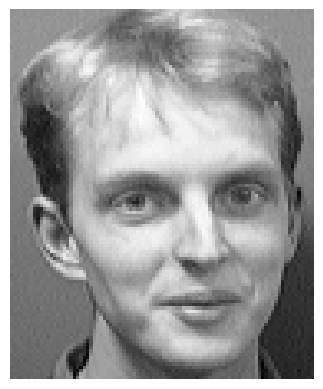

In [ ]:
# access any single image

usr_name = 40
samp_no = 6

dataset_path = "/content/drive/MyDrive/Colab_Notebooks/orl_face/orl_face/u%d/%d.png"%(40,1)

# read the image
im = mimg.imread(dataset_path)

print(type(im))
print(im.shape)

# display the image
plt.imshow(im,cmap='gray')
plt.axis('off')

In [ ]:
# convert the 2D-data of image into 1-D features
feat = im.reshape(1,-1)# shift all the values of the image
#into the columns in one single row
print(im.shape)
print(feat.shape)
print("range:",im.min(),'-',im.max())

(112, 92)
(1, 10304)
range: 0.019607844 - 0.8156863


In [ ]:
# logic to access all the samples of all
# the users
num_users = 40
num_samples = 10
tot_samples = num_users*num_samples
data = np.zeros((tot_samples,im.shape[0]*im.shape[1]))
label = np.zeros((tot_samples))
images = np.zeros((tot_samples,im.shape[0],im.shape[1]))
indx=-1
for i in range(1,num_users+1,1): # to traverse users
  for j in range(1,num_samples+1,1): # to traverse samples
    indx = indx+1
    # access any single image
    usr_name = i
    samp_no = j

    path = "/content/drive/MyDrive/Colab_Notebooks/orl_face/orl_face/u%d/%d.png"%(usr_name,samp_no)

    # read the image
    im = mimg.imread(path)
    feat = im.reshape(1,-1)
    data[indx,:]=feat
    label[indx]=i
    images[indx,:,:]=im
    print("user num ",i,'samp no',j,'processed...')

user num  1 samp no 1 processed...
user num  1 samp no 2 processed...
user num  1 samp no 3 processed...
user num  1 samp no 4 processed...
user num  1 samp no 5 processed...
user num  1 samp no 6 processed...
user num  1 samp no 7 processed...
user num  1 samp no 8 processed...
user num  1 samp no 9 processed...
user num  1 samp no 10 processed...
user num  2 samp no 1 processed...
user num  2 samp no 2 processed...
user num  2 samp no 3 processed...
user num  2 samp no 4 processed...
user num  2 samp no 5 processed...
user num  2 samp no 6 processed...
user num  2 samp no 7 processed...
user num  2 samp no 8 processed...
user num  2 samp no 9 processed...
user num  2 samp no 10 processed...
user num  3 samp no 1 processed...
user num  3 samp no 2 processed...
user num  3 samp no 3 processed...
user num  3 samp no 4 processed...
user num  3 samp no 5 processed...
user num  3 samp no 6 processed...
user num  3 samp no 7 processed...
user num  3 samp no 8 processed...
user num  3 samp n

In [ ]:
X = data.copy()
y = label.copy()


# split the data into 70:30 ratio
Xtrain,Xtest,Ytrain,ytest = model_selection.train_test_split(X,y,test_size=0.3,random_state=5)
print(Xtrain.shape,Ytrain.shape)
print(Xtest.shape,ytest.shape)

ker = ['poly','linear','rbf']
c_value = [1,2,3]

# pre allocation of the result variable
result = np.zeros((len(ker),len(c_value)))
for i in range(len(ker)):
  for j in range(len(c_value)):
    # create the svm classifier
    orl_svm_model = svm.SVC(kernel=ker[i],gamma='scale',C=c_value[j])

    # train the model
    orl_svm_model = orl_svm_model.fit(Xtrain,Ytrain)

    # predict the labels
    ypred = orl_svm_model.predict(Xtest)

    # accuracy
    acc = metrics.accuracy_score(ypred,ytest)
    #print("accuracy:", acc)
    result[i,j]=acc
print(result)

ResultDF = pd.DataFrame(result,index=ker,columns=["C=1","C=2","C=3"])
print(ResultDF)

(280, 10304) (280,)
(120, 10304) (120,)
[[0.94166667 0.94166667 0.94166667]
 [0.95       0.95       0.95      ]
 [0.88333333 0.95       0.95      ]]
             C=1       C=2       C=3
poly    0.941667  0.941667  0.941667
linear  0.950000  0.950000  0.950000
rbf     0.883333  0.950000  0.950000


Training with CNN Model

In [ ]:

# create the CNN model
cnn_model = keras.models.Sequential() # empty framework
# Convolutinal layer 1
cnn_model.add(keras.layers.Conv1D(20,3,activation='relu',input_shape=(10304,1)))
# maxpooling -1
cnn_model.add(keras.layers.MaxPool1D(2))

# Convolutinal layer 2
cnn_model.add(keras.layers.Conv1D(40,3,activation='relu'))
# maxpooling -2
cnn_model.add(keras.layers.MaxPool1D(2))

# feed forwards network
cnn_model.add(keras.layers.Flatten()) # input layer
cnn_model.add(keras.layers.Dense(200,activation='relu')) # HL1
cnn_model.add(keras.layers.Dense(200,activation='relu')) # HL2
cnn_model.add(keras.layers.Dense(200,activation='relu')) # HL3
cnn_model.add(keras.layers.Dense(len(np.unique(Ytrain))+1)) # Output layer

# optimizer
loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True)
cnn_model.compile(optimizer='sgd',loss = loss,metrics=['accuracy'])
cnn_model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 10302, 20)         80        
                                                                 
 max_pooling1d (MaxPooling1  (None, 5151, 20)          0         
 D)                                                              
                                                                 
 conv1d_1 (Conv1D)           (None, 5149, 40)          2440      
                                                                 
 max_pooling1d_1 (MaxPoolin  (None, 2574, 40)          0         
 g1D)                                                            
                                                                 
 flatten (Flatten)           (None, 102960)            0         
                                                                 
 dense (Dense)               (None, 200)               2

In [ ]:
# train the cnn along with the validation data
history = cnn_model.fit(Xtrain,Ytrain,epochs=100,validation_data=(Xtest,ytest))

Epoch 1/100
9/9 [==============================] - 8s 784ms/step - loss: 3.7129 - accuracy: 0.0286 - val_loss: 3.7098 - val_accuracy: 0.0250
Epoch 2/100
9/9 [==============================] - 4s 488ms/step - loss: 3.6975 - accuracy: 0.0250 - val_loss: 3.6998 - val_accuracy: 0.0417
Epoch 3/100
9/9 [==============================] - 4s 491ms/step - loss: 3.6821 - accuracy: 0.0536 - val_loss: 3.7087 - val_accuracy: 0.0417
Epoch 4/100
9/9 [==============================] - 6s 737ms/step - loss: 3.6707 - accuracy: 0.0750 - val_loss: 3.6933 - val_accuracy: 0.0250
Epoch 5/100
9/9 [==============================] - 4s 486ms/step - loss: 3.6564 - accuracy: 0.0821 - val_loss: 3.6841 - val_accuracy: 0.0333
Epoch 6/100
9/9 [==============================] - 4s 486ms/step - loss: 3.6381 - accuracy: 0.0607 - val_loss: 3.6688 - val_accuracy: 0.0750
Epoch 7/100
9/9 [==============================] - 6s 718ms/step - loss: 3.6145 - accuracy: 0.1143 - val_loss: 3.6584 - val_accuracy: 0.0333
Epoch 8/100
9

Training with NN

In [ ]:
# create the neural network
nn_model = keras.Sequential() # create an empty nn feed forward
# framework
nn_model.add(keras.layers.Flatten
 (input_shape=(Xtrain.shape[0],Xtrain.shape[1]))) # input layer

nn_model.add(keras.layers.Dense(128,activation='relu')) # Hidden layer 1
nn_model.add(keras.layers.Dense(256,activation='relu')) # Hidden layer 2
nn_model.add(keras.layers.Dense(256,activation='relu')) # Hidden layer 3

nn_model.add(keras.layers.Dense(len(np.unique(Ytrain)))) # output layer



# optimizer add
nn_model.compile(optimizer="SGD",
                 loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                 metrics=['accuracy'])

print(nn_model.summary())


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 2885120)           0         
                                                                 
 dense_4 (Dense)             (None, 128)               369295488 
                                                                 
 dense_5 (Dense)             (None, 256)               33024     
                                                                 
 dense_6 (Dense)             (None, 256)               65792     
                                                                 
 dense_7 (Dense)             (None, 40)                10280     
                                                                 
Total params: 369404584 (1.38 GB)
Trainable params: 369404584 (1.38 GB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [ ]:
# train the model for Xtrain and Ytrain
history = nn_model.fit(Xtrain,Ytrain,epochs=20,validation_data=(Xtest,ytest))


Epoch 1/20


ValueError: in user code:

    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1401, in train_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1384, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1373, in run_step  **
        outputs = model.train_step(data)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1150, in train_step
        y_pred = self(x, training=True)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_1" is incompatible with the layer: expected shape=(None, 280, 10304), found shape=(None, 10304)


In [ ]:
plt.figure(1)
plt.plot